# **Import Library**

melakukan import library yang digunakan dalam proyek ini

In [70]:
import pandas as pd
import numpy as np
import gdown
import zipfile
import os

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.colab import files

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow import keras
from keras import layers

# **Data Loading**

Menampilkan dataset yang akan digunakan pada proyek ini

In [71]:
from google.colab import files
uploaded = files.upload()

Saving archive (6).zip to archive (6) (2).zip


In [72]:
import zipfile
import os

# Ganti dengan nama file ZIP yang kamu upload
zip_file = 'archive (6).zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # diekstrak ke folder 'dataset'

# Verifikasi isi folder
print("Isi folder setelah ekstrak:")
print(os.listdir('dataset'))

Isi folder setelah ekstrak:
['Ratings.csv', 'Users.csv', 'recsys_taxonomy2.png', 'DeepRec.png', 'Books.csv', 'classicRec.png']


In [73]:
# books = pd.read_csv('Books.csv') # Original line
# ratings = pd.read_csv('Ratings.csv') # Original line
# users = pd.read_csv('Users.csv') # Original line

books = pd.read_csv('dataset/Books.csv') # Updated line
ratings = pd.read_csv('dataset/Ratings.csv') # Updated line
users = pd.read_csv('dataset/Users.csv') # Updated line

print("Jumlah data books: ", len(books['ISBN'].unique()))
print("Jumlah data ratings: ", len(ratings))
print("Jumlah data users: ", len(users['User-ID'].unique()))

<ipython-input-73-176b054c2e0f>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('dataset/Books.csv') # Updated line


Jumlah data books:  271360
Jumlah data ratings:  1149780
Jumlah data users:  278858


# **Univariate Exploratory Data Analysis**

Melakukan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

# **Books**
Dataset books berisi informasi mengenai buku-buku yang tersedia di dalam sistem Book-Crossing. Tujuan awal dari eksplorasi ini adalah untuk memahami karakteristik data buku secara umum.

### **Deskripsi Variabel**

- ISBN : Nomor identifikasi unik untuk setiap buku.
- Book-Title : Judul buku.
- Book-Author : Nama penulis buku.
- Year-Of-Publication : Tahun terbit buku.
- Publisher : Nama penerbit buku.
- Image-URL-S : URL gambar buku ukuran kecil.
- Image-URL-M : URL gambar buku ukuran sedang.
- Image-URL-L : URL gambar buku ukuran besar.


Menampilkan info data


In [74]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Menampilkan banyak data unik

In [75]:
print('Banyak buku: ', len(books['ISBN'].unique()))
print('Banyak judul buku: ', len(books['Book-Title'].unique()))
print('Banyak pengarang: ', len(books['Book-Author'].unique()))
print('Banyak penerbit: ', len(books['Publisher'].unique()))
print('Jumlah tahun terbit: ', len(books['Year-Of-Publication'].unique()))

Banyak buku:  271360
Banyak judul buku:  242135
Banyak pengarang:  102023
Banyak penerbit:  16808
Jumlah tahun terbit:  202


Ditemukan perbedaan antara jumlah ISBN dan judul buku (Book-Title). Oleh karena itu, kode di bawah ini digunakan untuk melakukan pengecekan jumlah kemunculan setiap judul buku:

In [76]:
books['Book-Title'].value_counts()

,count
Book-Title,
Selected Poems,27
Little Women,24
Wuthering Heights,21
Adventures of Huckleberry Finn,20
The Secret Garden,20
...,...
On a Clear Day You Can See General Motors: John Z. De Lorean's Look Inside the Automotive Giant,1
What Every Kid Should Know,1
The Seventh Enemy (A Brady Coyne Mystery),1



Hasil dari kode tersebut menunjukkan bahwa terdapat beberapa buku dengan judul yang sama.


---

Sebagai contoh, pada judul "Selected Poems"

In [77]:
selected_poems_books = books[books['Book-Title'] == 'Selected Poems']
selected_poems_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,0811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...
127462,0520012984,Selected Poems,Paul Verlaine,1970,University of California Press,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...
156894,0871401541,Selected Poems,E. E. Cummings,1994,Liveright Publishing Corporation,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...
158312,0060909897,Selected Poems,Gwendolyn Brooks,1963,Harpercollins,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...
175602,0571050190,Selected Poems,T. T Gunn,1962,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...
183908,1550651498,Selected Poems,Ralph Gustafson,2001,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...


Pencarian dengan judul yang sama menghasilkan beberapa entri buku yang identik pada judul, tetapi berbeda pada ISBN, penulis, penerbit, atau tahun terbit.

---

Menampilkan isi data dari Year-Of-Publication

In [78]:
print('List tahun terbit: ', books['Year-Of-Publication'].unique())

List tahun terbit:  [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940'

Ketika melakukan eksplorasi terhadap kolom Year-Of-Publication, ditemukan bahwa beberapa entri berisi data yang bukan merupakan tahun, seperti nama penerbit (DK Publishing Inc, Gallimard) atau angka yang tidak logis (misalnya, 0, 1376, 2020, 2050).


---


Mencoba menampilkan isi tahun yang nilainya tidak sesuai itu

In [79]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Setelah dilakukan investigasi lebih lanjut, kasus-kasus seperti ini ternyata terjadi karena pergeseran data antar kolom saat proses input. Untuk menjaga integritas data, tiga entri dengan kesalahan input tersebut dihapus.

In [80]:
book_to_drop = ['078946697X', '2070426769', '0789466953']
books = books[~books['ISBN'].isin(book_to_drop)]

Kemudian untuk nilai-nilai tahun yang tidak realistis (di luar rentang wajar publikasi, seperti 0 atau di atas 2006) diubah menjadi nilai kosong (NaN) dan diisi dengan rata-rata tahun yang valid menggunakan codingan di bawah ini.

In [81]:
# Nilai 0 tidak valid dan karena kumpulan data ini diterbitkan pada tahun 2004, diasumsikan tahun-tahun setelah 2006 menjadi
# Menetapkan tahun yang tidak valid sebagai NaN
# Convert 'Year-Of-Publication' to numeric, errors='coerce' will replace invalid parsing with NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.nan

# mengganti NaN dengan nilai rata-rata yearOfPublication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

<ipython-input-81-6f683a795cb9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)


Setelah tahapan tersebut, kolom tahun terbit telah berisi nilai yang realistis.

In [82]:
print('List tahun terbit: ', books['Year-Of-Publication'].unique())

List tahun terbit:  [2002. 2001. 1991. 1999. 2000. 1993. 1996. 1988. 2004. 1998. 1994. 2003.
 1997. 1983. 1979. 1995. 1982. 1985. 1992. 1986. 1978. 1980. 1952. 1987.
 1990. 1981. 1989. 1984. 1968. 1961. 1958. 1974. 1976. 1971. 1977. 1975.
 1965. 1941. 1970. 1962. 1973. 1972. 1960. 1966. 1920. 1956. 1959. 1953.
 1951. 1942. 1963. 1964. 1969. 1954. 1950. 1967. 2005. 1957. 1940. 1937.
 1955. 1946. 1936. 1930. 1925. 1948. 1943. 1947. 1945. 1923. 1939. 1926.
 1938. 1911. 1904. 1949. 1932. 1928. 1929. 1927. 1931. 1914. 1934. 1910.
 1933. 1902. 1924. 1921. 1900. 1944. 1917. 1901. 1908. 1906. 1935. 1806.
 2006. 1909. 1378. 1919. 1922. 1897. 1376.]


Kemudian, tipe data pada kolom Year-Of-Publication diubah dari tipe data object menjadi integer agar bisa diproses secara numerik.


---


Menampilkan info data

In [83]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271355 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB



Menampilkan barplot 10 Author Teratas dengan Buku Terbitan Terbanyak

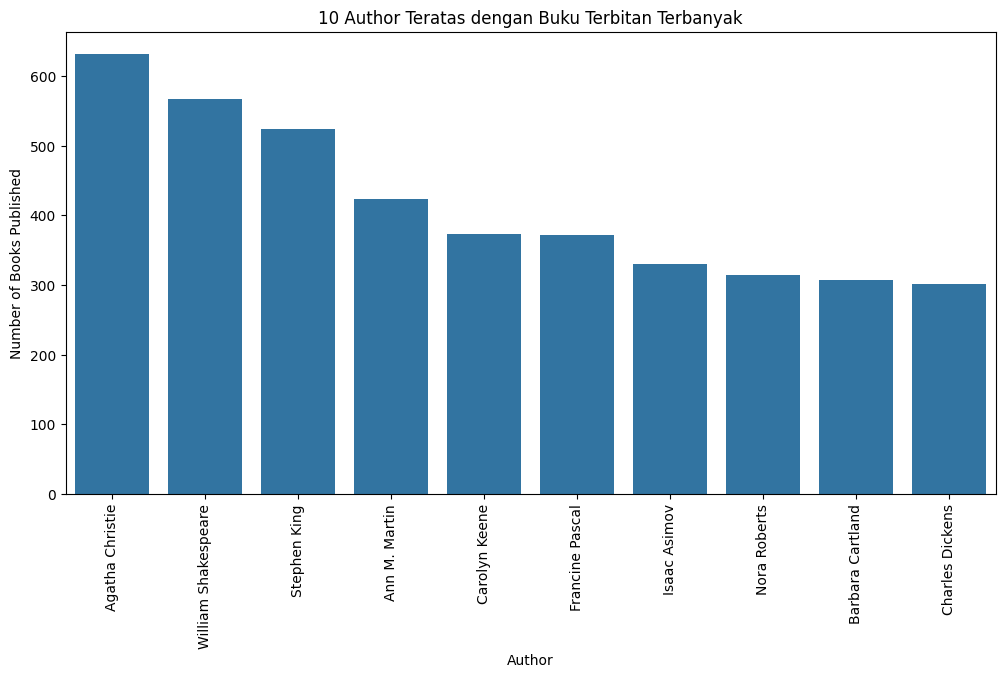

In [84]:
author_counts = books['Book-Author'].value_counts()

top_10_author = author_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_author.index, y=top_10_author.values)
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Number of Books Published')
plt.title('10 Author Teratas dengan Buku Terbitan Terbanyak')
plt.show()

Berdasarkan barplot yang menampilkan 10 penulis teratas dengan jumlah buku terbitan terbanyak, terlihat jelas bahwa Agatha Christie mendominasi dengan jumlah publikasi yang signifikan, jauh melampaui penulis lainnya. William Shakespeare menempati posisi kedua, diikuti oleh Stephen King di urutan ketiga. Secara keseluruhan, grafik ini memperlihatkan distribusi jumlah buku yang diterbitkan oleh para penulis terkemuka, dengan penurunan bertahap dari penulis dengan publikasi terbanyak hingga penulis di urutan kesepuluh, yaitu Charles Dickens.


---


Menampilkan barplot 10 Publisher Teratas dengan Buku Terbitan Terbanyak

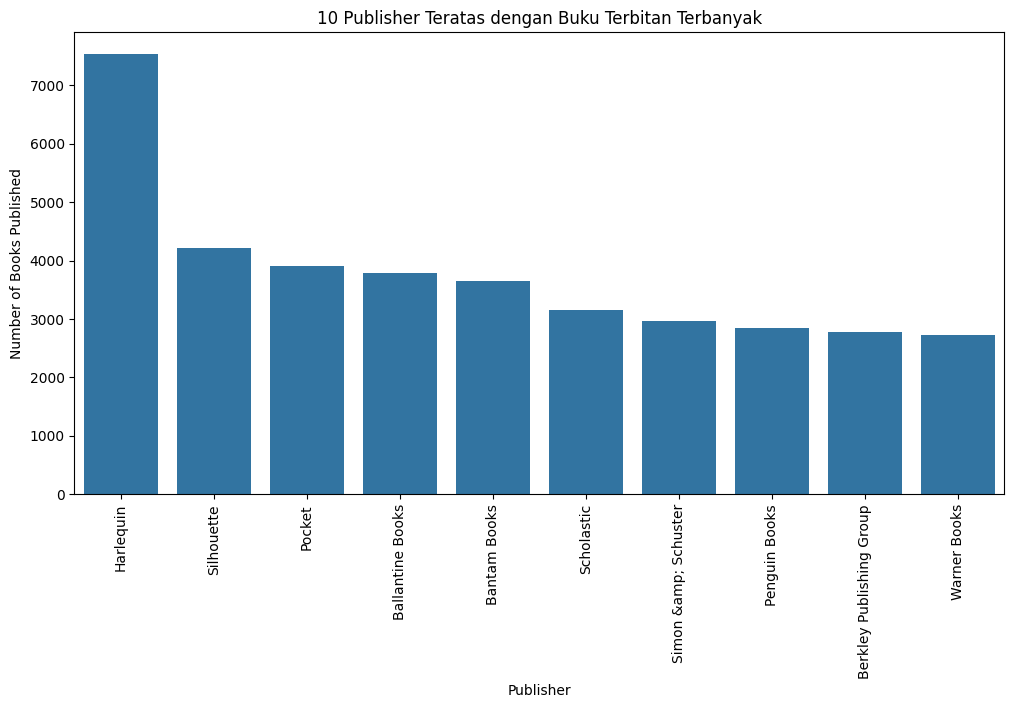

In [85]:
publisher_counts = books['Publisher'].value_counts()

top_10_publishers = publisher_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values)
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Number of Books Published')
plt.title('10 Publisher Teratas dengan Buku Terbitan Terbanyak')
plt.show()

Barplot ini menyajikan informasi mengenai 10 penerbit teratas berdasarkan jumlah buku yang telah mereka terbitkan. Terlihat bahwa Harlequin menduduki posisi puncak dengan jumlah publikasi yang jauh lebih tinggi dibandingkan penerbit lainnya. Silhouette berada di urutan kedua, diikuti oleh Pocket dan Ballantine Books yang memiliki jumlah publikasi serupa. Secara keseluruhan, grafik ini menggambarkan adanya dominasi yang signifikan dari beberapa penerbit besar dalam industri penerbitan buku, dengan penurunan jumlah publikasi secara bertahap hingga penerbit di urutan kesepuluh, yaitu Warner Books.


---


Menampilkan 5 data teratas

In [86]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Menampilkan missing value

In [87]:
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


Hanya ada dua kolom yang memiliki missing values, dan jumlahnya sangat kecil sehingga tidak signifikan terhadap keseluruhan dataset.

### **Ratings**

#### **Deskripsi Variabel**

- `User-ID` : ID unik pengguna.
- `ISBN` : Nomor ISBN buku yang diberi rating.
- `Book-Rating` : Skor rating yang diberikan pengguna (rentang 0–10).

Dataset ratings mencatat penilaian yang diberikan oleh pengguna terhadap buku. Dataset ini menjadi sangat penting karena akan digunakan untuk analisis preferensi pengguna dan sistem rekomendasi.


---


Menampilkan info data

In [88]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Menampilkan data unik dari masing-masing variabel

In [89]:
print('Banyak user rating buku: ', len(ratings['User-ID'].unique()))
print('Banyak buku dirating: ', len(ratings['ISBN'].unique()))
print('Banyak skala rating: ', len(ratings['Book-Rating'].unique()))

Banyak user rating buku:  105283
Banyak buku dirating:  340556
Banyak skala rating:  11


Menampilkan skala rating yang unik (0-10)

In [90]:
print('Skala rating yang diberikan: ', ratings['Book-Rating'].unique())

Skala rating yang diberikan:  [ 0  5  3  6  8  7 10  9  4  1  2]


Skala rating yang diberikan:  [ 0  5  3  6  8  7 10  9  4  1  2]
Rating diberikan dalam skala **0 hingga 10**, dengan total 11 nilai unik. Berikut adalah interpretasi awal:

- **Rating 0** kemungkinan besar berarti tidak ada rating eksplisit yang diberikan oleh pengguna. Ini dikenal sebagai implicit rating atau bisa jadi kesalahan input.
- **Rating 1–10** menunjukkan penilaian eksplisit, dengan nilai lebih tinggi menandakan tingkat kesukaan yang lebih besar.


---


Mentotalkan rating berdasarkan skalanya

In [91]:
ratings["Book-Rating"].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


Barplot dari pembagian ratings buku

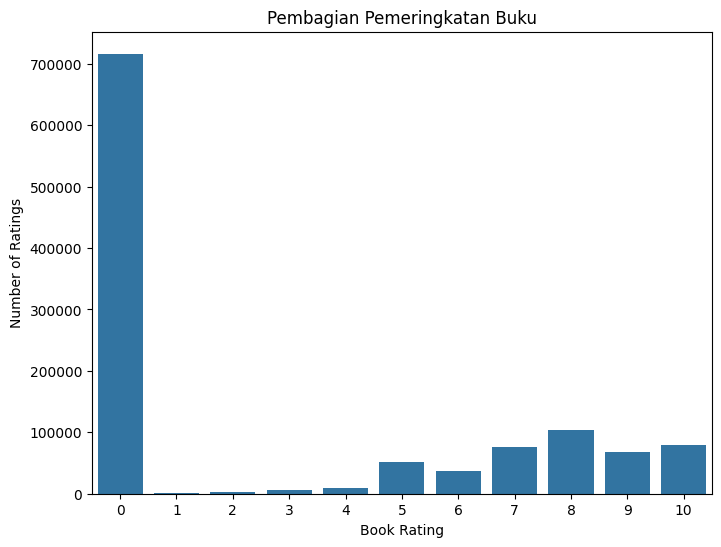

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.title('Pembagian Pemeringkatan Buku')
plt.show()

Barplot ini memperlihatkan distribusi peringkat buku, dengan jelas menunjukkan bahwa mayoritas besar peringkat terkonsentrasi pada nilai 0. Hal ini mengindikasikan bahwa terdapat sejumlah besar buku yang belum atau tidak mendapatkan peringkat. Setelah nilai 0, jumlah peringkat secara umum meningkat seiring dengan kenaikan nilai peringkat, mencapai puncaknya pada peringkat 8, kemudian sedikit menurun pada peringkat 9 dan 10. Distribusi ini menyiratkan adanya polarisasi dalam pemberian peringkat, di mana banyak buku tidak dinilai sama sekali, sementara di antara buku yang dinilai, terdapat kecenderungan pemberian peringkat yang lebih tinggi.


---


Menampilkan 5 data teratas dataset

In [93]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Menampilkan deskripsi dari dataset rating

In [94]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Nilai tengah (median) berada di 0, mengindikasikan bahwa sebagian besar rating tidak eksplisit (banyak 0). Namun, nilai kuartil atas (75%) adalah 8, yang memperlihatkan bahwa ketika rating diberikan, nilainya cenderung tinggi.


---


Melakukan pengecekan missing value

In [95]:
print(ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


### **Users**
Dataset users mencatat informasi dasar tentang pengguna, seperti ID, lokasi, dan umur.

#### **Deskripsi Variabel**

- `User-ID` : ID unik pengguna.
- `Location` : Lokasi tempat tinggal pengguna.
- `Age` : Usia pengguna.


---


Menampilkan info dataset

In [96]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Menampilkan dari variabel secara unik

In [97]:
print('Banyak user: ', len(users['User-ID'].unique()))
print('Jumlah persebaran lokasi user: ', len(users['Location'].unique()))
print('Banyak umur user: ', len(users['Age'].unique()))

Banyak user:  278858
Jumlah persebaran lokasi user:  57339
Banyak umur user:  166


Mencari isi data age yang unik

In [98]:
print('List umur user: ', users['Age'].unique())

List umur user:  [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


Kolom `Age` memiliki nilai-nilai yang tidak masuk akal seperti `0`, `231`, dan `244`. Maka dilakukan pembersihan dengan cara:

- Umur di bawah 5 tahun atau di atas 90 tahun dianggap tidak valid dan diubah menjadi `NaN`
- Nilai `NaN` kemudian diisi dengan rata-rata umur pengguna yang valid
- Tipe data diubah ke `integer` agar lebih konsisten

In [99]:
# Umur di bawah 5 dan di atas 90 tidak masuk akal, maka menggantinya dengan NaN
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

# Replacing NaNs with mean
users.Age = users.Age.fillna(users.Age.mean())

# Setting the data type as int
users.Age = users.Age.astype(np.int32)

Menampilkan boxenplot distribusi usia pengguna

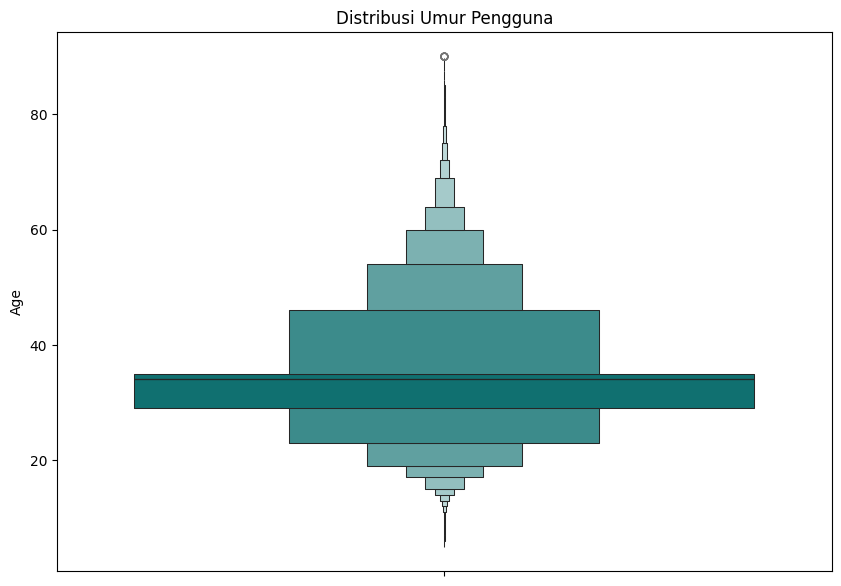

In [100]:
# Menggunakan seaborn untuk membuat boxenplot yang menampilkan distribusi usia pengguna.
plt.figure(figsize=(10, 7))
sns.boxenplot(users.Age, color='teal')
plt.title('Distribusi Umur Pengguna')
plt.show()

Boxplot ini menggambarkan persebaran umur para pengguna. Mayoritas nilai umur terpusat di kisaran 25 hingga 45 tahun, yang tercermin dari posisi kotak utama pada grafik. Garis hitam yang berada di tengah kotak menunjukkan nilai median umur. Garis vertikal di kedua sisi kotak (whisker) memperlihatkan rentang usia di luar kuartil pertama dan ketiga. Adanya titik di atas whisker bagian atas menandakan keberadaan outlier, yakni satu pengguna yang memiliki usia jauh lebih tinggi dibandingkan pengguna lainnya.



---

Menampilkan 5 data user teratas

In [101]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


Menampilkan describe dari data

In [102]:
users.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,34.432926
std,80499.51502,10.512758
min,1.00000,5.000000
25%,69715.25000,29.000000
50%,139429.50000,34.000000
75%,209143.75000,35.000000
max,278858.00000,90.000000


Melakukan pencarian missing value

In [103]:
print(users.isnull().sum())

User-ID     0
Location    0
Age         0
dtype: int64


Tidak ada missing value

# **Data Preprocessing**

Proses menyiapkan data mentah menjadi format yang lebih siap untuk analisis atau model machine learning

Menampilkan data unik dari ISBN pada dataset buku

In [104]:
print('Banyak buku: ', len(books['ISBN'].unique()))

Banyak buku:  271357


Mengambil 15.000 baris data secara acak dari DataFrame books dengan random_state=5

In [105]:
# Mengambil 15.000 baris data secara acak dari DataFrame books dengan random_state=5
reduced_books = books.sample(n=15000, random_state=5)

reduced_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
225958,1551580004,Canada from Space: Satellite Photographs,Brian Banks,1995,"Camden House Publishing (Ontario, CA)",http://images.amazon.com/images/P/1551580004.0...,http://images.amazon.com/images/P/1551580004.0...,http://images.amazon.com/images/P/1551580004.0...
170364,155971672X,The Healing Earth: Nature's Medicine for the T...,Philip Sutton Chard,1999,Northword Press,http://images.amazon.com/images/P/155971672X.0...,http://images.amazon.com/images/P/155971672X.0...,http://images.amazon.com/images/P/155971672X.0...
114831,0809075571,Pathfinder: John Charles FrÂ¿mont and the Cour...,Tom Chaffin,2002,Hill &amp; Wang Pub,http://images.amazon.com/images/P/0809075571.0...,http://images.amazon.com/images/P/0809075571.0...,http://images.amazon.com/images/P/0809075571.0...
10932,0446610348,Knight in My Bed,Sue-Ellen Welfonder,2002,Warner Forever,http://images.amazon.com/images/P/0446610348.0...,http://images.amazon.com/images/P/0446610348.0...,http://images.amazon.com/images/P/0446610348.0...
214387,0821766295,Seeking Celeste (Zebra Regency Romance),Hayley Ann Solomon,2000,Zebra Books,http://images.amazon.com/images/P/0821766295.0...,http://images.amazon.com/images/P/0821766295.0...,http://images.amazon.com/images/P/0821766295.0...
...,...,...,...,...,...,...,...,...
5889,0385307888,I Could Do Anything If I Only Knew What It Was...,Barbara Sher,1994,Delacorte Press,http://images.amazon.com/images/P/0385307888.0...,http://images.amazon.com/images/P/0385307888.0...,http://images.amazon.com/images/P/0385307888.0...
6416,0425105695,The Moving Finger (Miss Marple Mysteries (Pape...,Agatha Christie,1994,Berkley Publishing Group,http://images.amazon.com/images/P/0425105695.0...,http://images.amazon.com/images/P/0425105695.0...,http://images.amazon.com/images/P/0425105695.0...
193020,0440211123,Death Grip,Brian Hodge,1992,Dell Publishing Company,http://images.amazon.com/images/P/0440211123.0...,http://images.amazon.com/images/P/0440211123.0...,http://images.amazon.com/images/P/0440211123.0...
90610,0821732625,Nap Time: The True Story of Sexual Abuse at a ...,Lisa Manshel,1990,Zebra Books,http://images.amazon.com/images/P/0821732625.0...,http://images.amazon.com/images/P/0821732625.0...,http://images.amazon.com/images/P/0821732625.0...


Mengecek apakah data memiliki duplikat

In [106]:
unique_isbn_list = reduced_books['ISBN'].unique().tolist()
len(unique_isbn_list)

15000

Membuat dataframe baru bernama reduced_ratings yang berisi baris-baris dari dataframe ratings di mana nilai dalam kolom 'ISBN' terdapat dalam list unique_isbn_list. Dengan kata lain, kode ini memfilter dataframe ratings untuk hanya menyertakan rating buku-buku yang ISBN-nya ada dalam daftar ISBN unik.

In [107]:
reduced_ratings = ratings[ratings['ISBN'].isin(unique_isbn_list)]
reduced_ratings

,User-ID,ISBN,Book-Rating
22,276747,1570231028,0
53,276762,3596125006,0
118,276813,8423996565,8
123,276813,8478885218,6
161,276828,2290321028,0
...,...,...,...
1149656,276685,0312858531,0
1149698,276688,0449907422,0
1149704,276688,0553074946,9
1149711,276688,0553566040,6


Menghapus tiga kolom, yaitu 'Image-URL-S', 'Image-URL-M', dan 'Image-URL-L', dari dataframe reduced_books. Ini kemungkinan dilakukan untuk menyederhanakan dataframe atau karena kolom-kolom tersebut tidak relevan untuk analisis atau pemodelan yang akan dilakukan selanjutnya.

In [108]:
reduced_books = reduced_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

Menggabungkan dataframe rating dengan book berdasarkan nilai ISBN

In [109]:
#Menggabungkan dataframe rating dengan book berdasarkan nilai ISBN
booksrate = pd.merge(reduced_ratings, reduced_books, on='ISBN', how='left')
booksrate

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276747,1570231028,0,"Change Your Job, Change Your Life: High Impact...",Ronald L. Krannich,1999,Impact Publications
1,276762,3596125006,0,Briefe der Liebe.,Maria Nurowska,1995,"Fischer (Tb.), Frankfurt"
2,276813,8423996565,8,La hija del CanÃ­bal,Rosa Montero,1998,"Espasa Calpe Mexicana, S.A."
3,276813,8478885218,6,La Fiesta De Ralph,Lisa Jewell,1994,Emece Editores
4,276828,2290321028,0,Le chateau des carpathes,Jules Verne,2002,J'ai lu
...,...,...,...,...,...,...,...
59026,276685,0312858531,0,People of the Silence (The First North America...,Kathleen O'Neal Gear,1996,St Martins Pr
59027,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books
59028,276688,0553074946,9,How to Murder the Man of Your Dreams,Dorothy Cannell,1995,Bantam Dell Pub Group
59029,276688,0553566040,6,Missing Joseph,Elizabeth George,1994,Bantam Books


Menghitung jumlah rating kemudian menggabungkannya berdasarkan ISBN

In [110]:
# Menghitung jumlah rating kemudian menggabungkannya berdasarkan ISBN
booksrate.groupby('ISBN').sum()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0001711253,156534,0,The Big Honey Hunt,Stan Berenstein,1942,HarperCollins Publishers
000171421X,274301,0,It's Not Easy Being a Bunny (A Beginner Book),Marilyn Sadler,1984,HarperCollins Publishers
0001842749,82649,0,The Growing SummerThe Growing Summer,Noel StreatfeildNoel Streatfeild,3968,HarperCollins PublishersHarperCollins Publishers
0002006502,98510,0,The Devil Is Clever: A Memoir of My Romanian M...,Kenneth Radu,2004,HarperFlamingo Canada
0002157446,222586,8,The valour and the horror: The untold story of...,Merrily Weisbord,1991,Harper Collins
...,...,...,...,...,...,...
B00009EF82,1625655,26,HannibalHannibalHannibalHannibalHannibalHannib...,Thomas HarrisThomas HarrisThomas HarrisThomas ...,19990,Delacorte PressDelacorte PressDelacorte PressD...
B00009ZWDN,263877,0,Atonement,Ian McEwan,1994,Knopf
B0000VZEJQ,88283,10,Roald Dahl's Revolting Rhymes,Roald Dahl,2002,Knopf Books for Young Readers


# **Data Preparation**


Melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan


---


Setelah dilakukan proses EDA, ditemukan bahwa masih terdapat beberapa nilai kosong (missing values) dalam gabungan dataset `booksrate`. Berikut ini adalah jumlah missing value dari masing-masing kolom:

In [111]:
# Cek missing value dengan fungsi isnull()
booksrate.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,1


In [112]:
# Membersihkan missing value dengan fungsi dropna()
booksrate_clean = booksrate.dropna()

Fungsi ini secara otomatis menghapus baris yang memiliki nilai kosong pada salah satu kolom. Karena hanya ada satu baris yang terpengaruh, maka tidak akan berdampak signifikan terhadap keseluruhan dataset. Dengan menghapus missing value maka dapat menghindari error pada saat melakukan analisis atau pemodelan dan memastikan integritas data tetap terjaga tanpa baris yang tidak lengkap.


---


Mengecek kembali missing value dengan fungsi isnull

In [113]:
# Mengecek kembali missing value dengan fungsi isnull()
booksrate_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


Menampilkan Dataset

In [114]:
booksrate_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276747,1570231028,0,"Change Your Job, Change Your Life: High Impact...",Ronald L. Krannich,1999,Impact Publications
1,276762,3596125006,0,Briefe der Liebe.,Maria Nurowska,1995,"Fischer (Tb.), Frankfurt"
2,276813,8423996565,8,La hija del CanÃ­bal,Rosa Montero,1998,"Espasa Calpe Mexicana, S.A."
3,276813,8478885218,6,La Fiesta De Ralph,Lisa Jewell,1994,Emece Editores
4,276828,2290321028,0,Le chateau des carpathes,Jules Verne,2002,J'ai lu
...,...,...,...,...,...,...,...
59026,276685,0312858531,0,People of the Silence (The First North America...,Kathleen O'Neal Gear,1996,St Martins Pr
59027,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books
59028,276688,0553074946,9,How to Murder the Man of Your Dreams,Dorothy Cannell,1995,Bantam Dell Pub Group
59029,276688,0553566040,6,Missing Joseph,Elizabeth George,1994,Bantam Books


Setelah membersihkan missing value, langkah selanjutnya adalah memastikan tidak ada data duplikat dalam data buku. Duplikat yang dimaksud di sini adalah data dengan ISBN yang sama muncul lebih dari sekali.

In [115]:
# Membuat variabel preparation yang berisi dataframe booksrate_clean kemudian membuang data duplikat pada variabel preparation
preparation = booksrate_clean.drop_duplicates('ISBN')
preparation


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276747,1570231028,0,"Change Your Job, Change Your Life: High Impact...",Ronald L. Krannich,1999,Impact Publications
1,276762,3596125006,0,Briefe der Liebe.,Maria Nurowska,1995,"Fischer (Tb.), Frankfurt"
2,276813,8423996565,8,La hija del CanÃ­bal,Rosa Montero,1998,"Espasa Calpe Mexicana, S.A."
3,276813,8478885218,6,La Fiesta De Ralph,Lisa Jewell,1994,Emece Editores
4,276828,2290321028,0,Le chateau des carpathes,Jules Verne,2002,J'ai lu
...,...,...,...,...,...,...,...
58996,276538,325701404X,0,Kinder fÃ?Â¼r AnfÃ?Â¤nger.,Reinhart Lempp,1984,Diogenes
58997,276538,3770402774,6,"Lucky Luke, Bd.66, Eine Woche Wilder Westen",Rene. Goscinny,1993,"Egmont Ehapa, Berlin"
59002,276582,0312130287,0,Bird in a Cage: A Deb Ralston Mystery (Detecti...,Lee Martin,1995,St Martins Pr
59024,276680,0802141358,0,The Mammoth Cheese,Sheri Holman,2004,Grove Press


Kolom `ISBN` (International Standard Book Number) merupakan pengenal unik untuk setiap buku. Dengan menghapus data duplikat berdasarkan kolom ini, kita menjamin bahwa tidak ada entri buku yang redundan dalam data yang akan diproses lebih lanjut. Dengan langkah ini, maka dapat menghindari bias data karena satu buku yang sama muncul lebih dari sekali dan menjaga akurasi dalam sistem rekomendasi yang berbasis konten (content-based filtering), karena sistem akan mengenali setiap buku hanya satu kali.

Setelah data dibersihkan dari duplikat, kolom-kolom penting seperti `ISBN`, `Book-Title`, `Book-Author`, `Year-Of-Publication`, dan `Publisher` kemudian dikonversi ke dalam bentuk list.

In [116]:
# Mengonversi data series ISBN menjadi dalam bentuk list
book_isbn = preparation['ISBN'].tolist()

# Mengonversi data series ‘Book-Title’ menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()

# Mengonversi data series ‘Book-Author’ menjadi dalam bentuk list
book_author = preparation['Book-Author'].tolist()

# Mengonversi data series ‘Year-Of-Publication’ menjadi dalam bentuk list
book_year = preparation['Year-Of-Publication'].tolist()

# Mengonversi data series ‘Publisher’ menjadi dalam bentuk list
book_publisher = preparation['Publisher'].tolist()

print(len(book_isbn))
print(len(book_title))
print(len(book_author))
print(len(book_year))
print(len(book_publisher))

14930
14930
14930
14930
14930


Seluruh list memiliki panjang yang konsisten, yaitu 14.930 elemen, yang menunjukkan bahwa tidak terdapat data yang hilang selama proses konversi. Langkah ini bertujuan untuk mengubah data menjadi format list, sehingga lebih mudah untuk dimanipulasi pada tahap pengembangan content-based recommender. Selain itu, format list memberikan fleksibilitas lebih tinggi dalam proses pembuatan dictionary, penerapan TF-IDF vectorizer, maupun penggabungan fitur metadata.

# **Model Development dengan Content Based Filtering**

Langkah awal adalah menyusun dataframe baru bernama `books_new`.

In [117]:
# Membuat dictionary untuk data ‘book_isbn’, ‘book_title’, ‘book_author’, dan 'book_publisher'
books_new = pd.DataFrame({
    'isbn': book_isbn,
    'title': book_title,
    'author': book_author,
    'year': book_year,
    'publisher': book_publisher
})
books_new

,isbn,title,author,year,publisher
0,1570231028,"Change Your Job, Change Your Life: High Impact...",Ronald L. Krannich,1999,Impact Publications
1,3596125006,Briefe der Liebe.,Maria Nurowska,1995,"Fischer (Tb.), Frankfurt"
2,8423996565,La hija del CanÃ­bal,Rosa Montero,1998,"Espasa Calpe Mexicana, S.A."
3,8478885218,La Fiesta De Ralph,Lisa Jewell,1994,Emece Editores
4,2290321028,Le chateau des carpathes,Jules Verne,2002,J'ai lu
...,...,...,...,...,...
14925,325701404X,Kinder fÃ?Â¼r AnfÃ?Â¤nger.,Reinhart Lempp,1984,Diogenes
14926,3770402774,"Lucky Luke, Bd.66, Eine Woche Wilder Westen",Rene. Goscinny,1993,"Egmont Ehapa, Berlin"
14927,0312130287,Bird in a Cage: A Deb Ralston Mystery (Detecti...,Lee Martin,1995,St Martins Pr
14928,0802141358,The Mammoth Cheese,Sheri Holman,2004,Grove Press


Langkah ini mencakup transformasi data buku dari format series—yang kemungkinan berasal dari pemrosesan dataset sebelumnya—ke dalam bentuk list. List tersebut kemudian dimanfaatkan untuk membentuk beberapa kolom pada dataframe `books_new`, yang mencakup ‘isbn’, ‘book_title’, ‘book_author’, ‘year_of_publication’, dan ‘publisher’. Tujuan utama pembuatan *dataframe* ini adalah untuk mempermudah proses manipulasi serta konversi data ke dalam format yang mendukung pembangunan model content-based filtering.

In [118]:
data = books_new
data.sample(5)

,isbn,title,author,year,publisher
12054,0446896616,One on One,Jerry Segal,1977,Warner Books
9972,0801483867,Christianizing Death: The Creation of a Ritual...,Frederick S. Paxton,1996,Cornell University Press
8044,0590424017,Five True Dog Stories,Margaret Davidson,1989,Scholastic
3482,0552147419,Sex &amp; Drugs &amp; Sausage Rolls,Robert Rankin,2000,Transworld Publishers Limited
230,0373034725,Mcallister'S Baby (Baby Boom) (Harlequin Roma...,Peter David,1997,Harlequin


## **TF-IDF Vectorizer**

In [119]:
# Gabungkan author dan publisher menjadi satu kolom string
data['combined'] = data['author'].fillna('') + ' ' + data['publisher'].fillna('')

# Inisialisasi TF-IDF
tf = TfidfVectorizer()

# Fit dan transform ke kolom gabungan
tfidf_matrix = tf.fit_transform(data['combined'])

# Melihat fitur yang dihasilkan
features = tf.get_feature_names_out()

# print(tfidf_matrix.shape)
tf.get_feature_names_out()

array(['10', '12', '13', ..., 'â¼tting', 'ã³n', 'ãµes'], dtype=object)


#### **Penggabungan Informasi Teks**
Untuk membentuk representasi konten dari masing-masing buku, data dari kolom ‘book_author’ dan ‘publisher’ digabungkan menjadi satu kolom teks baru bernama ‘combined’.
Sebelum digabung, nilai kosong pada kedua kolom tersebut terlebih dahulu diisi dengan string kosong (''). Proses penggabungan dilakukan dengan menambahkan spasi sebagai pemisah antar nilai. Kolom 'combined' ini nantinya akan digunakan sebagai dasar dalam pengukuran kesamaan konten antar buku.

#### **Ekstraksi Ciri dengan TF-IDF**
Langkah berikutnya adalah membuat objek TfidfVectorizer, yang bertugas mengubah kumpulan teks menjadi representasi numerik dalam bentuk matriks. Setiap kata dalam kumpulan dokumen akan dianggap sebagai fitur, dan bobot TF-IDF digunakan untuk menunjukkan pentingnya kata tersebut dalam dokumen tertentu dibandingkan dengan seluruh kumpulan dokumen (corpus).

Metode fit_transform() dijalankan pada kolom ‘combined’. Fungsi fit akan membangun kosakata dari seluruh isi teks, sedangkan transform akan mengonversi setiap teks menjadi vektor numerik berdasarkan bobot TF-IDF. Hasil dari proses ini adalah matriks tfidf_matrix.

Kemudian, tf.get_feature_names_out() digunakan untuk memperoleh daftar seluruh fitur (kata-kata unik) yang berhasil diekstrak oleh TfidfVectorizer.



In [120]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['combined'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(14930, 11806)

tfidf_matrix.shape memberikan dimensi dari matriks TF-IDF. Jumlah baris sesuai dengan jumlah buku dalam dataset, dan jumlah kolom sesuai dengan jumlah fitur unik yang ditemukan dalam kolom 'combined'.

In [121]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

`tfidf_matrix.todense()` mengubah matriks sparse TF-IDF menjadi matriks padat. Meskipun representasi sparse lebih efisien untuk penyimpanan dan perhitungan dengan data teks berdimensi tinggi, representasi padat mungkin lebih mudah dipahami dalam beberapa kasus.

In [122]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan author, publisher
# Baris diisi dengan nama buku

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,da,fernando,tricia,steidl,carleton,vail,arvella,janus,watterson,silverman,...,perdue,tasker,germana,faron,sage,lewin,capuana,alpuget,bush,television
title,,,,,,,,,,,,,,,,,,,,,
Going to the Chapel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Let's Go to the Videotape! : All the Plays--and Replays--from My Life in Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Running Microsoft Windows Nt Workstation: Version 4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Art of Catching and Cooking Crabs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Feast Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Masterpieces of Fantasy and Enchantment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Swords Against Death,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Circus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alien Encounters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sebuah DataFrame dibentuk dari hasil matriks TF-IDF dalam bentuk dense (padat). Setiap kolom pada DataFrame ini dinamai berdasarkan fitur-fitur yang telah diekstraksi, yakni kata-kata yang berasal dari kolom ‘author’ dan ‘publisher’. Indeks dari DataFrame menggunakan nilai dari kolom ‘title’, yang kemungkinan merupakan hasil perubahan nama dari kolom ‘book_title’ pada tahap sebelumnya. Untuk mempermudah visualisasi, digunakan metode .sample() guna menampilkan sebagian kecil isi DataFrame secara acak, sehingga memudahkan dalam melihat distribusi bobot TF-IDF pada beberapa buku dan fitur.

### **Cosine Similarity**

In [123]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Fungsi cosine_similarity() yang berasal dari modul sklearn.metrics.pairwise digunakan untuk menghitung tingkat kemiripan cosine antar pasangan vektor TF-IDF dalam tfidf_matrix. Cosine similarity merupakan metode yang umum digunakan untuk menilai kesamaan antara dua vektor dalam ruang berdimensi banyak, terutama dalam konteks analisis teks. Nilai yang dihasilkan berada dalam rentang -1 hingga 1, di mana nilai 1 menunjukkan kemiripan yang sangat tinggi, sementara nilai mendekati -1 menunjukkan perbedaan yang signifikan.



In [124]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (14930, 14930)


title,"So Little Time (Mail Order Bride, Book 9)",The Cheerleader,Une danse aux abattoirs,Search Strategies in Mass Communication (3rd Edition),Rogue's Justice: A Michael Carolina Mystery
title,,,,,
Charlie's Touchdown,0.0,0.000000,0.0,0.0,0.0
A Song for the Asking,0.0,0.025916,0.0,0.0,0.0
Footprint Cambodia Handbook,0.0,0.000000,0.0,0.0,0.0
The Big Thaw,0.0,0.000000,0.0,0.0,0.0
E PLURIBUS UNICORN,0.0,0.000000,0.0,0.0,0.0
Opus 100,0.0,0.026655,0.0,0.0,0.0
Lenfirouape,0.0,0.000000,0.0,0.0,0.0
The Riddle of the Titanic,0.0,0.000000,0.0,0.0,0.0
When Bad Christians Happen to Good People: Where We Have Failed Each Other and How to Reverse the Damage,0.0,0.000000,0.0,0.0,0.0


Output dari cosine_similarity() berupa matriks NumPy yang kemudian dikonversi menjadi DataFrame cosine_sim_df, dengan indeks dan kolom berisi judul buku. Setiap elemen (i, j) dalam DataFrame merepresentasikan skor kemiripan cosine antara buku ke-i dan ke-j. Ukuran cosine_sim_df berbentuk persegi sesuai jumlah buku, dan metode .sample() digunakan untuk menampilkan sebagian data secara acak guna melihat pola kemiripan antar buku.


### **Mendapatkan Rekomendasi**

Mendefinisikan fungsi book_recommendations yang menerima judul buku, matriks kemiripan, dataframe informasi buku, dan jumlah rekomendasi yang diinginkan sebagai input. Fungsi ini mencari buku-buku yang paling mirip dengan judul yang diberikan berdasarkan matriks kemiripan dan mengembalikan dataframe berisi k buku rekomendasi teratas beserta informasi judul, penulis, dan penerbitnya.

In [125]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'author', 'publisher']], k=5):
  index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

  # Mengambil data dengan similarity terbesar dari index yang ada
  closest = similarity_data.columns[index[-1:-(k+2):-1]]

  # Drop title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
  closest = closest.drop(title, errors='ignore')

  return pd.DataFrame(closest).merge(items).head(k)

Mencari dan menampilkan baris dalam dataframe data di mana nilai pada kolom 'title' sama dengan string 'Harry Potter and the Prisoner of Azkaban (Book 3)'. Tujuannya adalah untuk melihat informasi lengkap mengenai buku tersebut dalam dataset.

In [126]:
data[data['title'] == 'Harry Potter and the Prisoner of Azkaban (Book 3)']

,isbn,title,author,year,publisher,combined
75,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,J. K. Rowling Scholastic



Memanggil fungsi book_recommendations dengan judul buku 'Harry Potter and the Prisoner of Azkaban (Book 3)' sebagai input. Tujuannya adalah untuk mendapatkan daftar 5 buku rekomendasi teratas yang paling mirip dengan buku tersebut berdasarkan perhitungan kemiripan yang telah dilakukan sebelumnya.

In [127]:
book_recommendations('Harry Potter and the Prisoner of Azkaban (Book 3)')

,title,author,publisher
0,Harry Potter and the Chamber of Secrets (Harry...,J. K. Rowling,Arthur A. Levine Books
1,Harry Potter and the Philosopher's Stone (Cove...,J.K. Rowling,BBC Consumer Publishing
2,Exploring Space: From Ancient Legends to the T...,Scholastic Books,Scholastic
3,Harry Potter und der Stein der Weisen,Joanne K. Rowling,Carlsen Verlag GmbH
4,Harry Potter und der Gefangene von Askaban. So...,Joanne K. Rowling,Dhv der HÃ¶rverlag


# **Model Development dengan Collaborative Filtering**


## **Data Understanding**

In [128]:
# Membaca dataset
df = reduced_ratings
df

,User-ID,ISBN,Book-Rating
22,276747,1570231028,0
53,276762,3596125006,0
118,276813,8423996565,8
123,276813,8478885218,6
161,276828,2290321028,0
...,...,...,...
1149656,276685,0312858531,0
1149698,276688,0449907422,0
1149704,276688,0553074946,9
1149711,276688,0553566040,6


Tahap awal persiapan data untuk collaborative filtering dilakukan dengan menggunakan DataFrame bernama reduced_ratings, yang kemungkinan merupakan hasil seleksi atau penyederhanaan dari dataset rating asli. Tujuan dari langkah ini adalah untuk menurunkan kompleksitas perhitungan dan memfokuskan analisis pada interaksi pengguna dan item yang lebih signifikan atau relevan.


## **Data Preparation**

In [129]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list User-ID:  [276747, 276762, 276813, 276828, 276847, 276854, 276859, 276866, 276872, 276887, 276925, 276928, 276929, 276953, 276957, 276964, 276984, 276986, 276988, 277042, 277051, 277079, 277087, 277124, 277139, 277143, 277157, 277183, 277187, 277195, 277203, 277220, 277244, 277351, 277363, 277378, 277388, 277427, 277436, 277469, 277478, 277523, 277563, 277565, 277589, 277601, 277623, 277627, 277629, 277639, 277641, 277660, 277662, 277681, 277710, 277744, 277776, 277807, 277812, 277841, 277873, 277908, 277928, 277929, 277954, 277962, 277965, 277982, 277984, 277989, 278019, 278026, 278034, 278044, 278079, 278111, 278137, 278144, 278188, 278194, 278250, 278253, 278257, 278307, 278311, 278330, 278342, 278346, 278356, 278361, 278368, 278418, 278491, 278524, 278535, 278538, 278543, 278582, 278633, 278637, 278665, 278723, 278771, 278773, 278774, 278838, 278843, 278851, 23, 64, 99, 114, 135, 144, 169, 176, 183, 242, 243, 254, 272, 273, 300, 302, 311, 362, 383, 384, 387, 388, 392, 424, 433

df['User-ID'].unique().tolist() menghasilkan list yang berisi nilai-nilai unik dari kolom 'User-ID'. Ini memastikan bahwa setiap pengguna dan setiap buku hanya direpresentasikan satu kali dalam list.

Dictionary ini memetakan setiap nilai unik (ID pengguna) ke sebuah indeks integer yang berurutan. Misalnya, pengguna dengan ID '22' mungkin dipetakan ke indeks 0, pengguna dengan ID '53' ke indeks 1, dan seterusnya.

Ini adalah dictionary kebalikan dari yang sebelumnya, memetakan indeks integer kembali ke nilai asli (ID pengguna atau ISBN). Ini berguna untuk interpretasi hasil model.

In [130]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_isbn = df['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_isbn)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_isbn)}

Fungsi df['ISBN'].unique().tolist() menghasilkan daftar berisi nilai unik dari kolom 'ISBN', memastikan setiap buku hanya muncul satu kali. Nilai-nilai ini kemudian dipetakan ke indeks numerik melalui dictionary, misalnya ISBN tertentu dipetakan ke indeks 0, 1, dan seterusnya. Sebaliknya, dictionary inverse digunakan untuk mengonversi indeks kembali ke nilai asli (seperti ID pengguna atau ISBN), sehingga hasil dari model lebih mudah diinterpretasikan.

In [131]:
pd.options.mode.chained_assignment = None

# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
df['book'] = df['ISBN'].map(book_to_book_encoded)


Metode .map() digunakan untuk menerapkan dictionary encoding ke kolom 'User-ID' dan 'ISBN' dalam dataframe df. Ini akan membuat dua kolom baru, 'user' dan 'book', yang berisi indeks integer yang sesuai untuk setiap interaksi (rating).

In [132]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_to_book_encoded)
print(num_book)

# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['Book-Rating'])

# Nilai maksimal rating
max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

17484
14931
Number of User: 17484, Number of Book: 14931, Min Rating: 0.0, Max Rating: 10.0



Setelah proses encoding dilakukan, jumlah pengguna unik (num_users) dan jumlah buku unik (num_book) diperoleh masing-masing sebanyak 17.484 dan 14.931 dengan menghitung panjang dictionary hasil encoding. Informasi ini sangat penting sebagai dasar dalam menentukan ukuran input untuk embedding layer pada model collaborative filtering berbasis neural network.

Kolom 'Book-Rating' kemudian dikonversi ke dalam tipe data float32. Konversi ini diperlukan karena algoritma machine learning umumnya lebih optimal dalam memproses data bertipe numerik dengan presisi desimal.

Selain itu, nilai minimum dan maksimum dari kolom rating juga dihitung, yaitu 0.0 dan 10.0. Nilai-nilai ini nantinya dapat digunakan dalam tahap normalisasi, agar rating berada dalam skala yang seragam dan sesuai dengan kebutuhan model, biasanya dalam rentang 0 hingga 1.


## **Membagi Data untuk Training dan Validasi**

In [133]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
109641,25409,0060562250,8.0,1586,2817
1104876,265115,0671759213,0.0,16744,772
585093,141235,0156278065,0.0,8963,9979
688723,167800,0373870027,0.0,10540,9494
458845,110076,0441531830,6.0,6975,8621
...,...,...,...,...,...
1058588,252775,0192839659,10.0,15991,5008
746660,180651,0399136479,8.0,11392,928
18100,3363,037570504X,0.0,292,518
310647,74542,1878067745,0.0,4748,643


Dataframe df diacak dengan menggunakan fungsi df.sample(frac=1, random_state=42). Parameter frac=1 menunjukkan bahwa seluruh baris dalam dataframe tetap disertakan, namun urutannya diacak secara menyeluruh. Penggunaan random_state=42 bertujuan untuk menjaga konsistensi hasil pengacakan setiap kali kode dijalankan, sehingga eksperimen dapat direproduksi dengan hasil yang sama.

In [134]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 1586  2817]
 [16744   772]
 [ 8963  9979]
 ...
 [  292   518]
 [ 4748   643]
 [16664  1005]] [0.8 0.  0.  ... 0.  0.  0. ]


- **Fitur (x)**:
Kolom 'user' dan 'book', yang masing-masing berisi hasil encoding, dipilih sebagai input fitur. Kombinasi dari kedua indeks ini berfungsi sebagai pasangan data yang merepresentasikan interaksi antara pengguna dan buku. Metode .values digunakan untuk mengubah dataframe tersebut menjadi array NumPy, agar bisa digunakan dalam model machine learning.

- **Label (y)**:
Untuk labelnya, digunakan kolom 'Book-Rating'. Nilai rating ini kemudian dinormalisasi ke dalam rentang antara 0 dan 1 dengan menggunakan rumus: (x - min_rating) / (max_rating - min_rating). Tujuan dari normalisasi ini adalah agar proses pelatihan model menjadi lebih stabil dan efisien.

Setelah itu, data dibagi menjadi dua bagian, yaitu data pelatihan sebanyak 80% dan data validasi sebesar 20%. Pemisahan dilakukan dengan menghitung indeks batas menggunakan train_indices. Selanjutnya, fitur dan label masing-masing dipisah menjadi x_train, x_val, y_train, dan y_val. Data pelatihan digunakan untuk membangun model, sedangkan data validasi dimanfaatkan untuk mengukur performa model selama pelatihan serta untuk membantu dalam proses penyetelan hyperparameter.


### **Proses Training**


Mendefinisikan kelas RecommenderNet, sebuah model neural network untuk rekomendasi. Model ini menggunakan embedding layers untuk merepresentasikan pengguna dan buku dalam ruang vektor laten, serta bias untuk menangkap preferensi individual dan popularitas buku, kemudian menggabungkannya untuk memprediksi rating melalui fungsi sigmoid.

In [137]:
import tensorflow as tf

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid


Menginisialisasi model RecommenderNet dengan jumlah pengguna, jumlah buku, dan ukuran embedding sebesar 50, lalu mengompilasinya dengan fungsi loss BinaryCrossentropy, optimizer Adam dengan learning rate 0.001, dan metrik evaluasi Root Mean Squared Error.

In [138]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai proses pelatihan model menggunakan data latih (x_train, y_train) dengan ukuran batch 16 selama 20 epoch, sambil mengevaluasi kinerja model pada data validasi (x_val, y_val) di setiap epoch.

In [139]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 94s 31ms/step - loss: 0.6680 - root_mean_squared_error: 0.4272 - val_loss: 0.5853 - val_root_mean_squared_error: 0.3774
Epoch 2/20
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 72s 24ms/step - loss: 0.5689 - root_mean_squared_error: 0.3712 - val_loss: 0.5766 - val_root_mean_squared_error: 0.3721
Epoch 3/20
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - loss: 0.5453 - root_mean_squared_error: 0.3570 - val_loss: 0.5669 - val_root_mean_squared_error: 0.3670
Epoch 4/20
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - loss: 0.5283 - root_mean_squared_error: 0.3479 - val_loss: 0.5598 - val_root_mean_squared_error: 0.3632
Epoch 5/20
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - loss: 0.5135 - root_mean_squared_error: 0.3385 - val_loss: 0.5574 - val_root_mean_squared_error: 0.3624
Epoch 6/20
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - loss: 0.4997 - root_mean_squared_error: 0.3304 - val_loss: 0.5549 - val_root_mean_squared_error: 0.3615
Epoch 7/20
2952/2952 ━━━━━━━

## **Visualisasi Metrik**

Menghasilkan grafik yang memvisualisasikan perubahan nilai Root Mean Squared Error (RMSE) selama proses pelatihan (train) dan evaluasi pada data validasi (test) di setiap epoch.

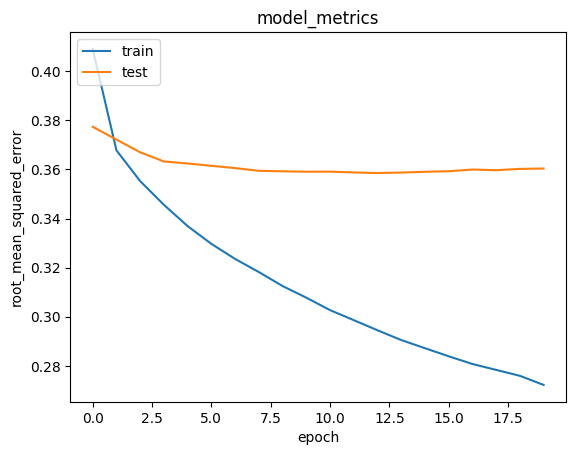

In [140]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Mendapatkan Rekomendasi Buku**

Mengambil sampel seorang pengguna secara acak, mengidentifikasi buku-buku yang belum pernah dibaca oleh pengguna tersebut, dan kemudian menyiapkan data dalam format yang sesuai untuk diprediksi oleh model collaborative filtering.

In [141]:
book_df = books_new

# Mengambil sample user
user_id = reduced_ratings['User-ID'].sample(5).iloc[0]
book_readed_by_user = reduced_ratings[reduced_ratings['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_readed = [[book_to_book_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

Menggunakan model yang telah dilatih untuk memprediksi rating untuk buku-buku yang belum dibaca oleh pengguna sampel, mengambil 10 buku dengan prediksi rating tertinggi sebagai rekomendasi, dan kemudian mencetak daftar buku yang diberi rating tinggi oleh pengguna tersebut serta 10 rekomendasi teratas.

In [142]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_readed[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_readed_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author, '-', row.publisher)

print('----' * 8)
print('Top 10 books recommendation')
print('----' * 8)

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author, '-', row.publisher)

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 75355
Book with high ratings from user
--------------------------------
The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary : Simon Winchester - Perennial
--------------------------------
Top 10 books recommendation
--------------------------------
One Fish Two Fish Red Fish Blue Fish (I Can Read It All by Myself Beginner Books) : DR SEUSS - Random House Books for Young Readers
The Baby Book: Everything You Need to Know About Your Baby from Birth to Age Two : Martha Sears - Little, Brown
Warchild : Karin Lowachee - Aspect
Life Is So Good : George Dawson - Penguin Books
The Teenage Liberation Handbook: How to Quit School and Get a Real Life and Education : Grace Llewellyn - Lowry House Pub
Shadowplay : Ron Cyr - LoonBooks
Dark Gold : Christine Feehan - Love Spell
Le Combat ordinaire, tome 1 : Larcenet - Dargaud
Keeping Watch : LAURIE R. KING - Bantam
Sluggy F

## **Evaluation**

Tahapan untuk mengevaluasi hasil darikedua model

### **Content Based Filtering**
Mengevaluasi model Content-Based Filtering dengan menghitung Precision, Recall, dan F1-Score. Kode ini menetapkan threshold kemiripan, membuat ground truth biner berdasarkan threshold, membandingkan dengan prediksi biner dari matriks cosine similarity, dan mencetak metrik evaluasi.


In [143]:
from sklearn.metrics import precision_recall_fscore_support

# Tentukan threshold kemiripan
threshold = 0.6

# Buat ground truth: 1 jika kemiripan >= threshold, 0 jika tidak
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# # Tampilkan sebagian ground truth sebagai heatmap untuk visualisasi
# ground_truth_df = pd.DataFrame(ground_truth, index=data['title'], columns=data['title'])
# sample_gt = ground_truth_df.sample(15, axis=0).sample(15, axis=1)

# Evaluasi berdasarkan sample ukuran tertentu
sample_size = 10000  # atau min(len(data), 10000)
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Flatten semua nilai kemiripan dan ground truth ke bentuk 1D
cosine_sim_flat = cosine_sim_sample.flatten()
ground_truth_flat = ground_truth_sample.flatten()

# Buat prediksi biner berdasarkan threshold
predictions = (cosine_sim_flat >= threshold).astype(int)

# Hitung precision, recall, dan f1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000


## **Collaborative Filtering**

Menghasilkan grafik garis yang menunjukkan nilai Root Mean Squared Error (RMSE) pada data pelatihan dan validasi di setiap epoch selama proses pelatihan model Collaborative Filtering, memungkinkan visualisasi kinerja model dan potensi overfitting.

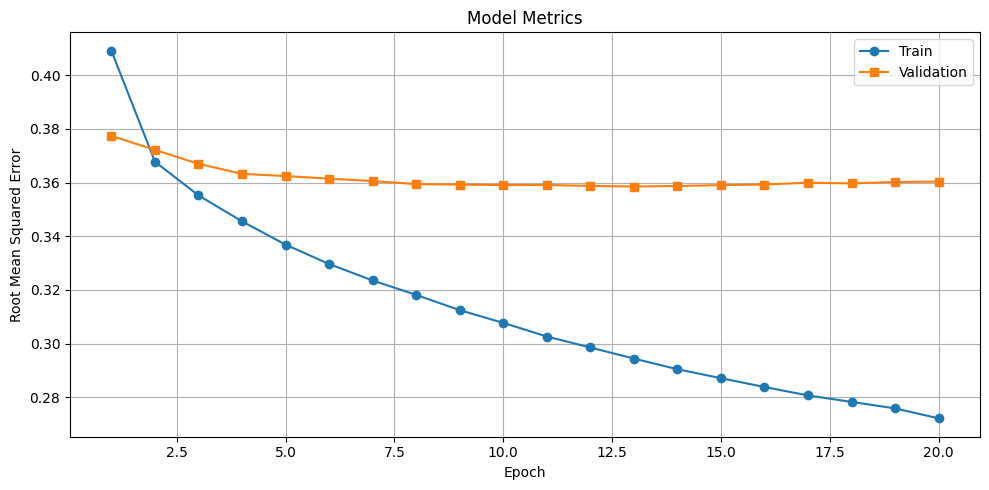

In [144]:
import matplotlib.pyplot as plt

# Misalnya ini hasil RMSE dari history model
rmse_train = history.history['root_mean_squared_error']
rmse_val = history.history['val_root_mean_squared_error']
epochs = range(1, len(rmse_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, rmse_train, marker='o')
plt.plot(epochs, rmse_val, marker='s')
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()